In [1]:
import pandas as pd

tokens_df = pd.read_csv("results/tokens.tsv", names=["gallery", "notation", "slug", "token"], delimiter="\t")

df = tokens_df.query("gallery == 'movies'").groupby(["token", "notation"])["slug"].nunique().reset_index()

In [2]:
import plotly.express as px

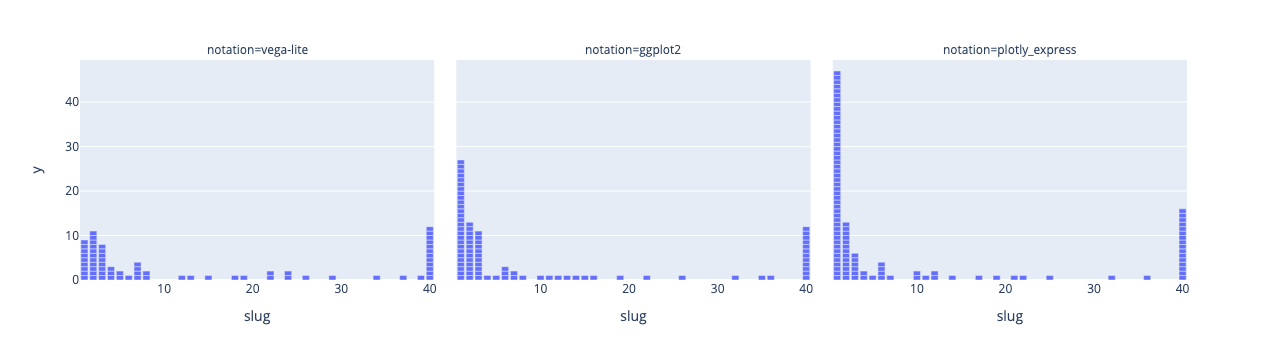

In [25]:
px.bar(df, x="slug", y=px.Constant(1), facet_col="notation", hover_name="token")#.add_shape(type="line", x0=0,y0=0, x1=30, y1=30, row="all", col="all")


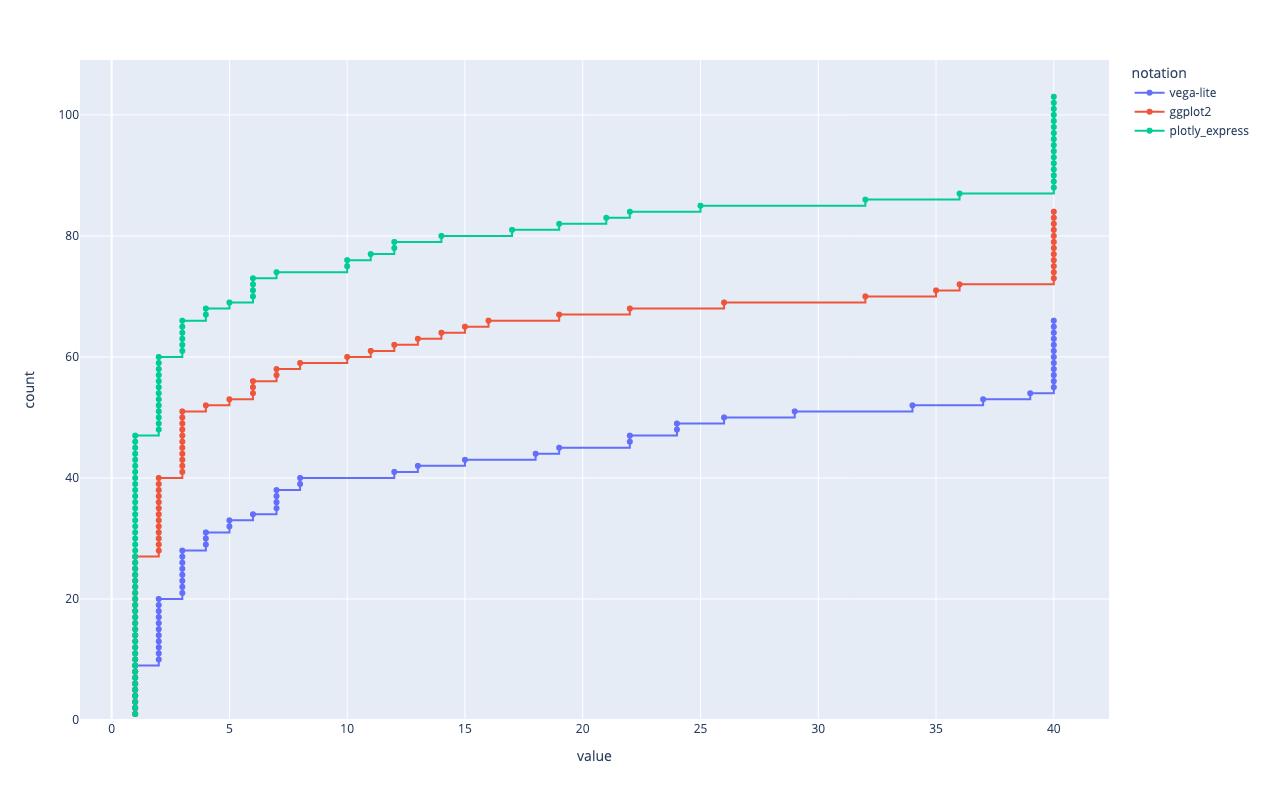

In [31]:
px.ecdf(df, color="notation", hover_name="token", ecdfnorm=None, height=800, markers=True)

In [50]:
import math

In [73]:
for notation, subdf in df.groupby("notation"):
    entropy = 0
    for _, r in subdf.iterrows():
        frac = r.slug/subdf.slug.max()
        entropy -= frac * math.log2(frac)
    print(notation, round(entropy, 2))

ggplot2 15.89
plotly_express 16.63
vega-lite 15.85


In [2]:
from src.tokens import load_tokens
import plotly.express as px

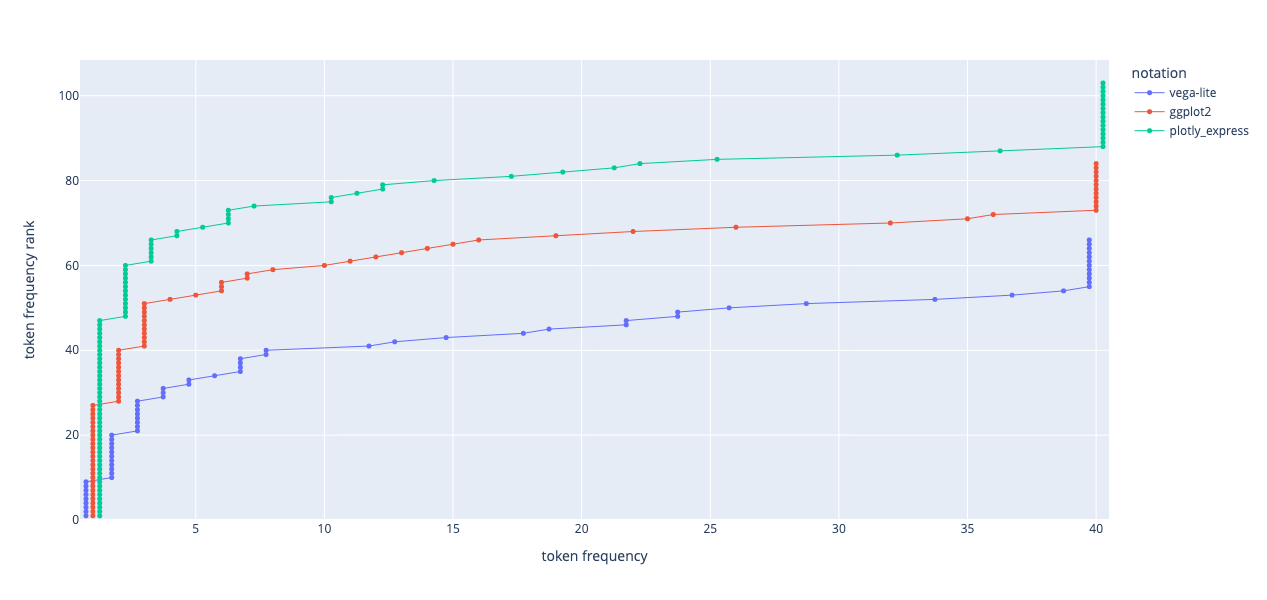

In [18]:
tokens_df = load_tokens()

gallery = "movies"

df = (
    tokens_df.query(f"gallery == '{gallery}'")
    .groupby(["token", "notation"])["slug"]
    .nunique()
    .reset_index()
)
fig = px.ecdf(
    df,
    x="slug",
    color="notation",
    hover_name="token",
    ecdfnorm=None,
    height=600,
    markers=True,
    lines=True,
    #ecdfmode="complementary",
    labels=dict(slug="token frequency"),
)
fig.update_traces(line_shape="linear", marker_size=5, line_width=1)
fig.update_yaxes(title_text="token frequency rank")
fig.update_layout(scattermode="group")